
# **GOOGLE Stock price prediction using LSTM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('/content/Google_train_data (1).csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 17s - loss: 0.0285 - 17s/epoch - 487ms/step
Epoch 2/20
35/35 - 13s - loss: 0.0114 - 13s/epoch - 359ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0099 - 6s/epoch - 176ms/step
Epoch 4/20
35/35 - 13s - loss: 0.0085 - 13s/epoch - 384ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0080 - 8s/epoch - 241ms/step
Epoch 6/20
35/35 - 6s - loss: 0.0073 - 6s/epoch - 175ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0074 - 7s/epoch - 214ms/step
Epoch 8/20
35/35 - 6s - loss: 0.0059 - 6s/epoch - 173ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0067 - 8s/epoch - 236ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0064 - 6s/epoch - 174ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 214ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0059 - 6s/epoch - 174ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0051 - 8s/epoch - 220ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0054 - 6s/epoch - 175ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0050 - 8s/epoch - 216ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0060 - 6s/epoch - 173ms/step
Epoch 17/20

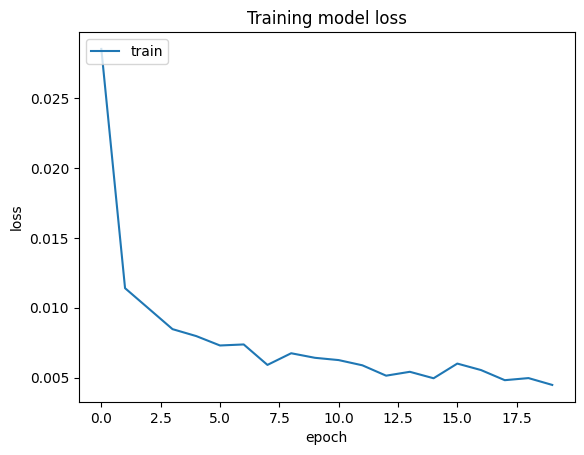

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('/content/Google_test_data (1).csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 64ms/step


array([[1.2176375],
       [1.219388 ],
       [1.2305107],
       [1.24703  ],
       [1.2589881],
       [1.2560576],
       [1.2404464],
       [1.221646 ],
       [1.2114896],
       [1.2108165],
       [1.2055948],
       [1.1952333],
       [1.1861517],
       [1.1778022],
       [1.1770486],
       [1.1825539],
       [1.2016029],
       [1.230013 ],
       [1.2608119],
       [1.2899528],
       [1.2979407],
       [1.2903224],
       [1.2671332],
       [1.2377418],
       [1.213973 ],
       [1.2033129],
       [1.2041409],
       [1.206557 ],
       [1.200164 ],
       [1.1892809],
       [1.1772628],
       [1.1637714],
       [1.1435051],
       [1.1190022],
       [1.111157 ],
       [1.1235304],
       [1.1469495],
       [1.1711208],
       [1.1922028],
       [1.2001748],
       [1.2093668],
       [1.2223458],
       [1.238454 ],
       [1.2534438],
       [1.2630066],
       [1.2629049],
       [1.2519978],
       [1.2437235],
       [1.2432102],
       [1.2513059],


In [14]:
predicted_price = sc.inverse_transform(y_pred)

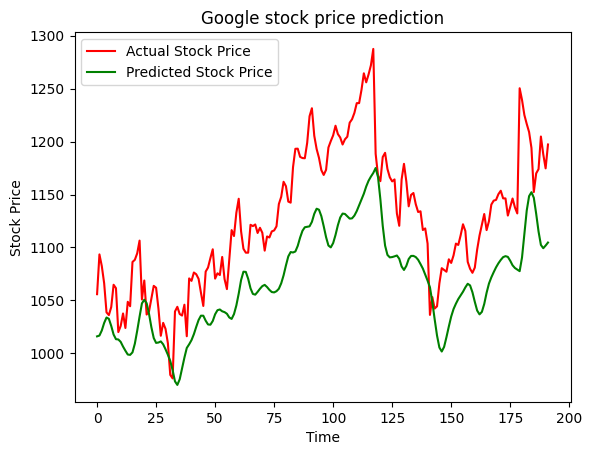

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# **TESLA Stock price prediction using Linear Regression**

In [20]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.0 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade plotly

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
tesla = pd.read_csv('/content/tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [23]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [24]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

<ipython-input-24-484d0f65faac>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tesla['Date'] = pd.to_datetime(tesla['Date'])


In [25]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [26]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

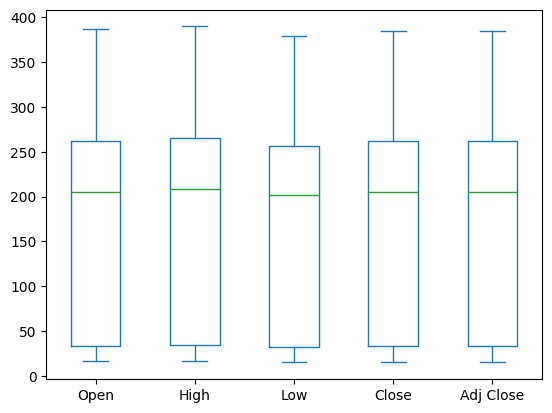

In [27]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [28]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.2 MB/s eta 0:00:00


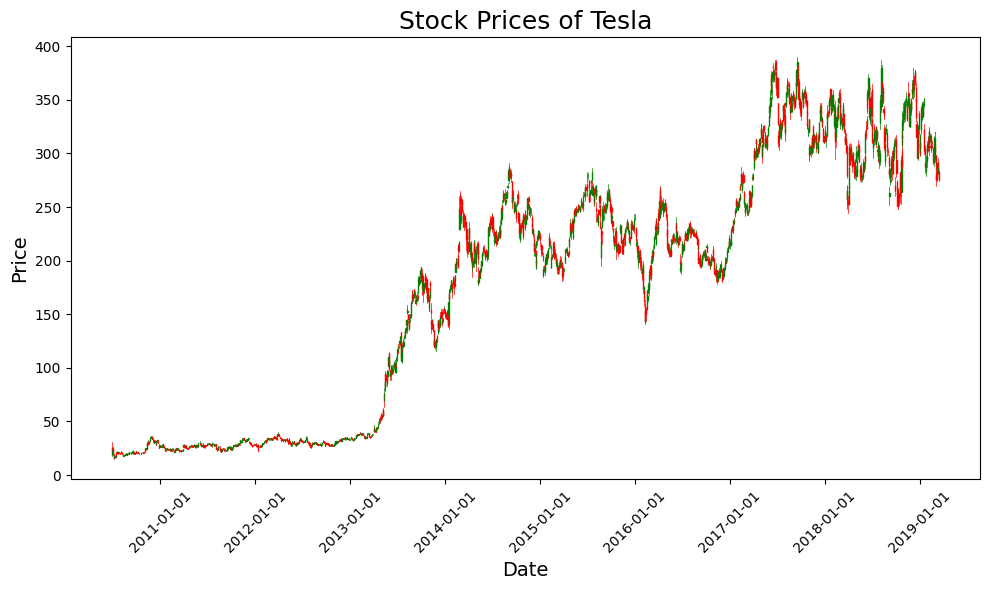

In [29]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
# Convert dates to matplotlib format
tesla['Date'] = mdates.date2num(tesla['Date'])

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Creating candlestick chart
candlestick_ohlc(ax, tesla[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.6, colorup='g', colordown='r')

# Adding title and labels
plt.title('Stock Prices of Tesla', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Formatting date on x-axis
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotating x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [30]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [31]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [32]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [33]:
from sklearn.linear_model import LinearRegression

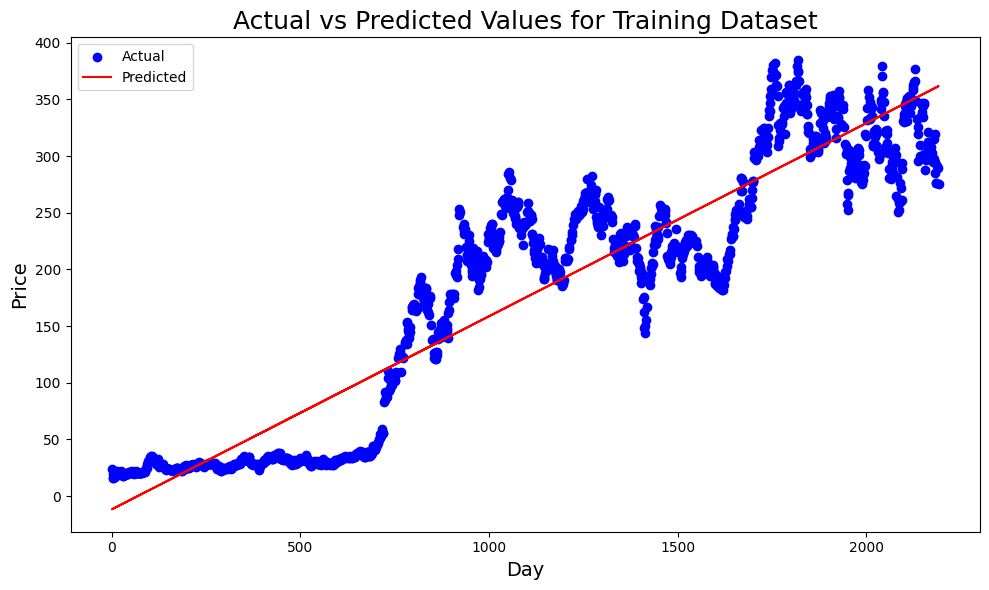

In [35]:
plt.figure(figsize=(10, 6))

# Actual values
plt.scatter(X_train[:, 0], Y_train, label='Actual', color='blue')

# Predicted values
plt.plot(X_train[:, 0], lm.predict(X_train), label='Predicted', color='red')

# Adding title and labels
plt.title('Actual vs Predicted Values for Training Dataset', fontsize=18)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Adding legend
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [36]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score

# Calculate additional evaluation metrics
mae_train = mean_absolute_error(Y_train, lm.predict(X_train))
mae_test = mean_absolute_error(Y_test, lm.predict(X_test))

mse_train = mean_squared_error(Y_train, lm.predict(X_train))
mse_test = mean_squared_error(Y_test, lm.predict(X_test))

medianae_train = median_absolute_error(Y_train, lm.predict(X_train))
medianae_test = median_absolute_error(Y_test, lm.predict(X_test))

explained_variance_train = explained_variance_score(Y_train, lm.predict(X_train))
explained_variance_test = explained_variance_score(Y_test, lm.predict(X_test))

# Append these metrics to the existing scores
scores += f'''
{'MAE'.ljust(10)}{mae_train}\t{mae_test}
{'MedianAE'.ljust(10)}{medianae_train}\t{medianae_test}
{'Explained Variance '.ljust(10)}{explained_variance_train}\t{explained_variance_test}
'''
print(scores)



Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845

MAE       35.47540144644424	34.21428826716784
MedianAE  30.382563103628343	28.814108968130057
Explained Variance 0.8658871776828706	0.861444031218157

